##     Flight Predictions - Adv ML Exam
_________________________________________

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_excel(r"C:\Users\SHIVANG\Documents\Imarticus\Advance ML\Exam\ML Advanced Exam Paper\Dataset\Flight Price Dataset\Flight_Price_Train.xlsx",header=0)
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### Q1. Perform Feature Engineering

#### a) Perform basic exploration like checking for top 5 records, shape, statistical info, duplicates, Null values etc.

In [6]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [9]:
train.shape

(10683, 11)

#### Handling missing values


In [11]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### There are only 2 null values in columns titled "Route" and "Total_Stops", hence we can drop them.

In [13]:
train.dropna(inplace=True)
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#### Checking for duplicates

In [15]:
train.duplicated().sum()

220

#### b) Extract Date, Month, Year from  Date of Journey column 

In [17]:
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y')
train['Dep_Time']=pd.to_datetime(train['Dep_Time'],format='%H:%M',errors='coerce').dt.time
train['Arrival_Time'] = pd.to_datetime(train['Arrival_Time'],errors='coerce').dt.time

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1001.4+ KB


In [19]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302


#### Creating new columns to extract date, month and year

In [21]:
train['Day_of_journey']=train['Date_of_Journey'].dt.day
train['Month_of_journey']=train['Date_of_Journey'].dt.month
train['Year_of_journey']=train['Date_of_Journey'].dt.year
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Year_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,2h 40m,non-stop,No info,12648,1,3,2019


##### Since the 'Date_of_Journey' column has been split, it is no longer required and can be dropped from the dataset.

In [23]:
train.drop(columns=['Date_of_Journey'],inplace=True)

________________________________

### Q2) Perform Exploratory Data Analysis (EDA) tasks 

#### a) Which airline is most preferred airline?

##### Lets check using a countplot

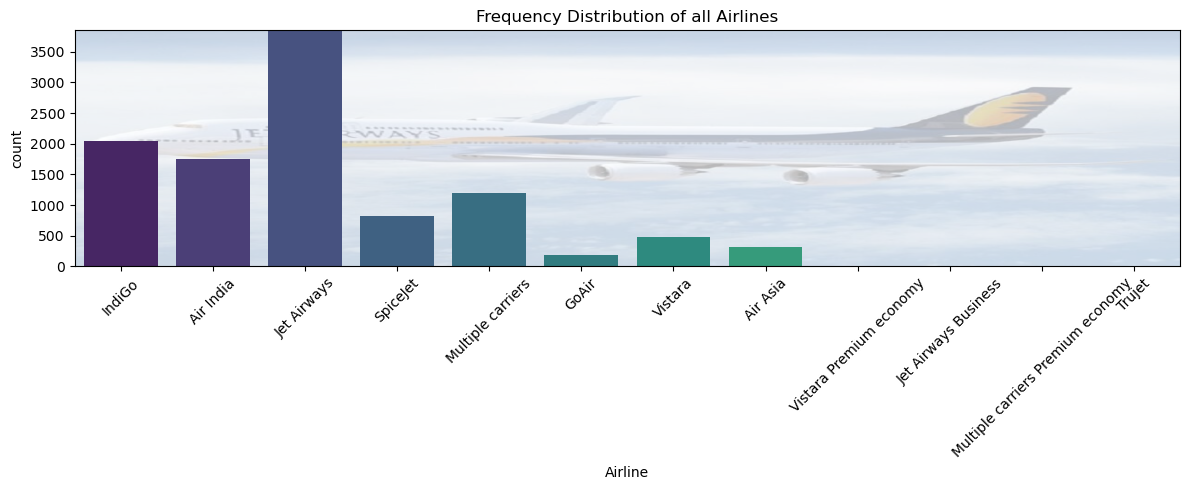

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load your background image
img = plt.imread(r"C:\Users\SHIVANG\Desktop\jet airways.jpg")  
# Create the plot
plt.figure(figsize=(12, 5))

# Add the background image
plt.imshow(img, extent=[-0.5, len(train['Airline'].unique()) - 0.5, 0, train['Airline'].value_counts().max()], 
           aspect='auto', alpha=0.3)  # Adjust alpha for transparency

# Plot the countplot
sns.countplot(data=train, x='Airline', palette='viridis')

# Adjust the plot
plt.title('Frequency Distribution of all Airlines')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [29]:
train['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

##### **_Observation:_** As we can see that the flight company 'Jet Airways' emerges as the most preferred airline, with approximately 4,000 flight bookings.

#### b) Find the majority of the flights take off from which source 

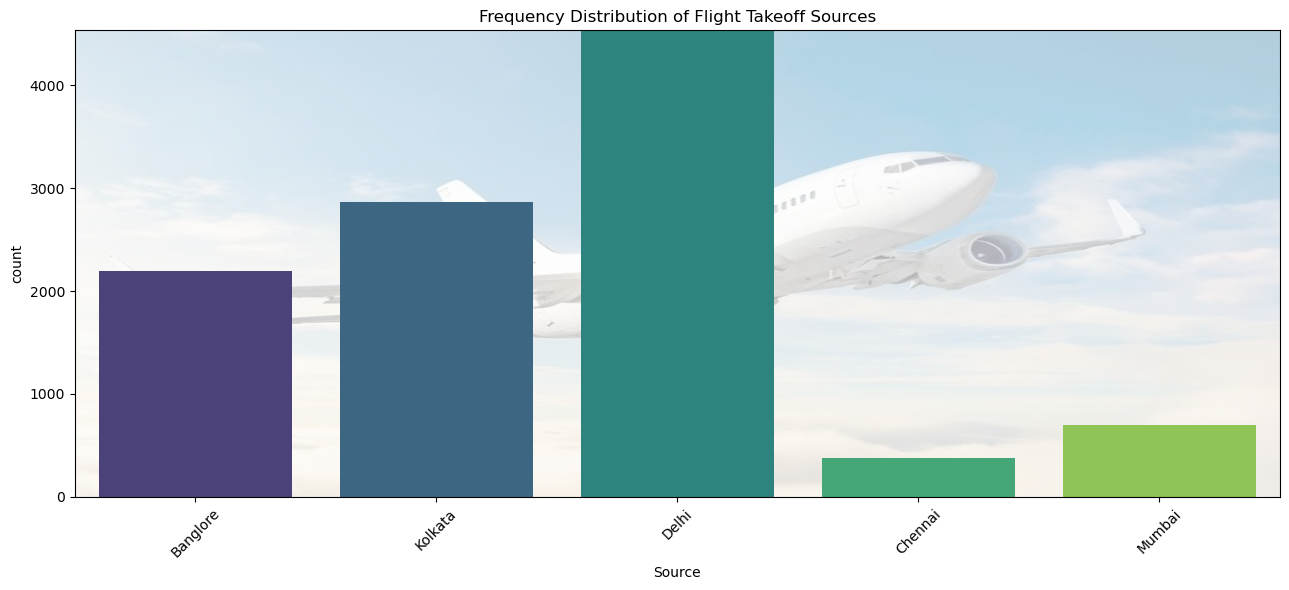

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Loading background image
img = plt.imread(r"C:\Users\SHIVANG\Desktop\Airplane-Sky-201811-001-720x475.jpg")

# Create the plot
plt.figure(figsize=(13, 6))

# Add the background image
plt.imshow(img, extent=[-0.5, len(train['Source'].unique()) - 0.5, 0, train['Source'].value_counts().max()], 
           aspect='auto', alpha=0.3)  # Adjust alpha for transparency

# Plot the countplot
sns.countplot(data=train, x='Source', palette='viridis')

# Adjust the plot
plt.title('Frequency Distribution of Flight Takeoff Sources')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


##### **_Observation:_** The majority of flights have originated from Delhi.

#### c) Find maximum flights land in which destination 

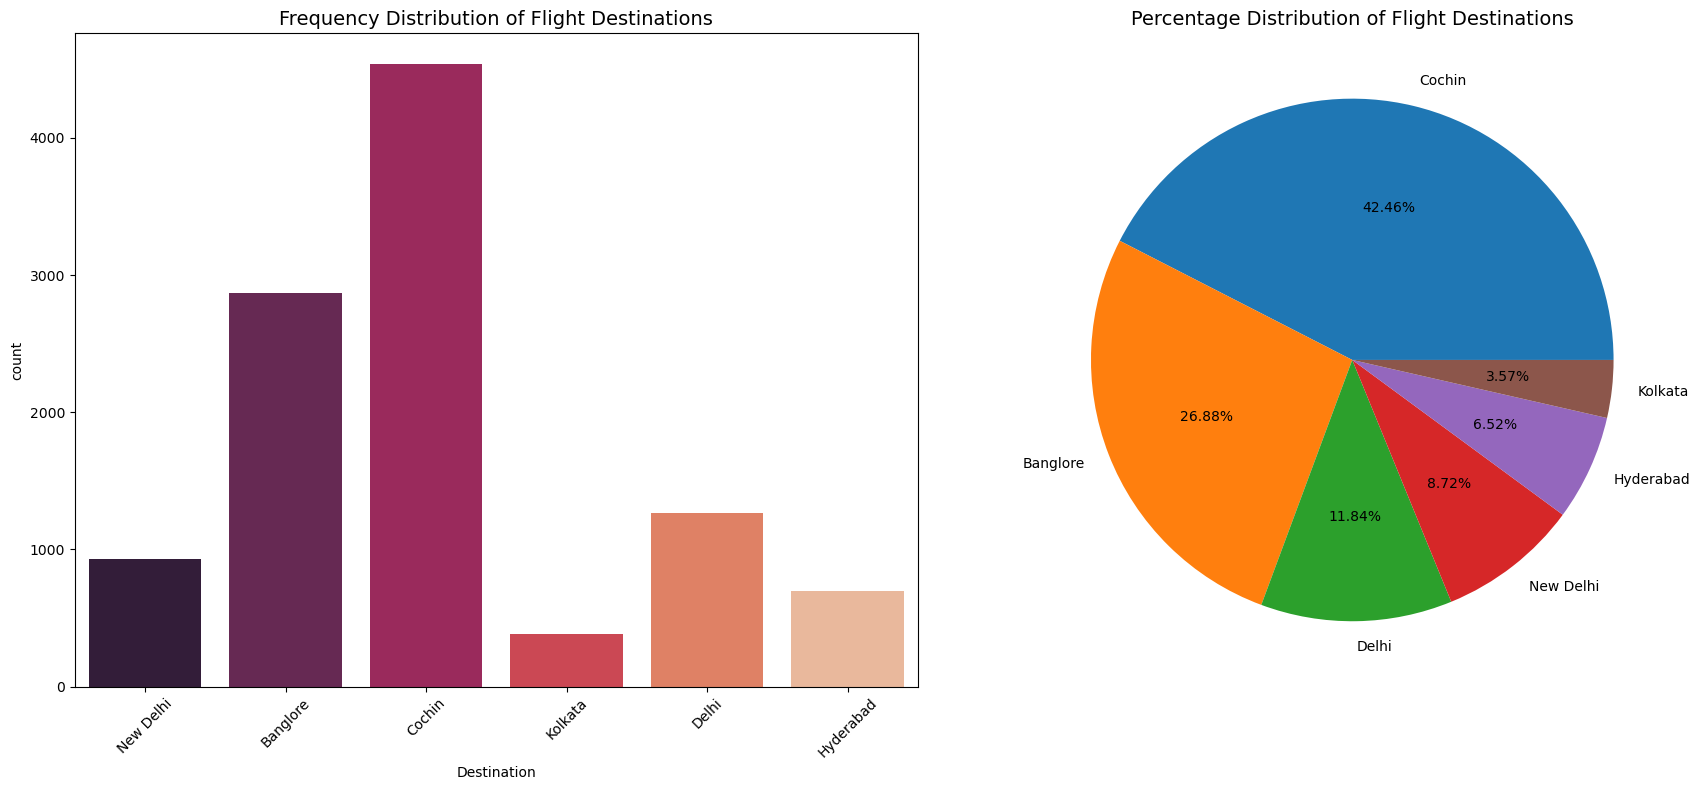

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  

# Pie chart for Percentage Distribution
train["Destination"].value_counts().plot(kind="pie", autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Percentage Distribution of Flight Destinations', fontsize=14)
axes[1].set_ylabel('')  # Remove y-axis label for pie chart

# Countplot for Frequency Distribution
sns.countplot(data=train, x='Destination', palette='rocket', ax=axes[0])
axes[0].set_title('Frequency Distribution of Flight Destinations', fontsize=14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)  

plt.tight_layout()
plt.show()

##### **_Observation:_** The bar graph and pie chart reveal that Cochin is the busiest airport in terms of flight landings, while Kolkata has the least. Approximately 42.5% of flights have landed in Cochin.

____________________

#### Q3) Compare independent features with Target feature to check the impact on price. 

##### a) Which airline has the highest price

In [40]:
highest_airline_price = train.groupby("Airline")["Price"].max().idxmax()
highest_value_price = train.groupby("Airline")["Price"].max().max()

print(f"Airline having the highest price: {highest_airline_price}, Price: {highest_value_price}")


Airline having the highest price: Jet Airways Business, Price: 79512


##### b)  Check if the business class flights are high price or low and find only those flights which price is higher than 50k.

In [42]:
business_class = train[train['Additional_Info'].str.contains('Business', case=False, na=False)]

In [43]:
business_class

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Year_of_journey
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45:00,11:25:00,5h 40m,1 stop,Business class,79512,1,3,2019
3032,Jet Airways,Banglore,New Delhi,BLR → BDQ → DEL,05:50:00,12:20:00,6h 30m,1 stop,Business class,28097,1,3,2019
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45:00,12:25:00,6h 40m,1 stop,Business class,62427,1,3,2019
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,09:45:00,14:25:00,4h 40m,1 stop,Business class,57209,1,3,2019


##### **_Observation_:** We observe that there are just 4 business class flights, with prices ranging between Rs 28,000 and Rs 79,512.

In [54]:
business_class_above_50k = business_class[business_class["Price"] > 50000]
business_class_above_50k

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Year_of_journey
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45:00,11:25:00,5h 40m,1 stop,Business class,79512,1,3,2019
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45:00,12:25:00,6h 40m,1 stop,Business class,62427,1,3,2019
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,09:45:00,14:25:00,4h 40m,1 stop,Business class,57209,1,3,2019


##### **_Observation:_** Among the 4 business class flights, 3 are priced above 50k!

##### Checking the number of flights priced above 50k in the overall dataset.

In [58]:
flights_above_50k = train[train["Price"] > 50000]
flights_above_50k

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Year_of_journey
657,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45:00,10:45:00,5h,1 stop,No info,52229,1,3,2019
1478,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:40:00,00:45:00,6h 5m,1 stop,No info,54826,18,3,2019
2618,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,22:50:00,05:05:00,6h 15m,1 stop,No info,54826,18,3,2019
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45:00,11:25:00,5h 40m,1 stop,Business class,79512,1,3,2019
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45:00,12:25:00,6h 40m,1 stop,Business class,62427,1,3,2019
5439,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,16:55:00,23:00:00,6h 5m,1 stop,No info,54826,1,3,2019
9715,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05:00,04:25:00,8h 20m,2 stops,No info,52285,6,3,2019
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,09:45:00,14:25:00,4h 40m,1 stop,Business class,57209,1,3,2019


##### **_Observation_:** A total of around 8 flights, including the 3 business class flights, from the overall dataset are priced above Rs 50k.

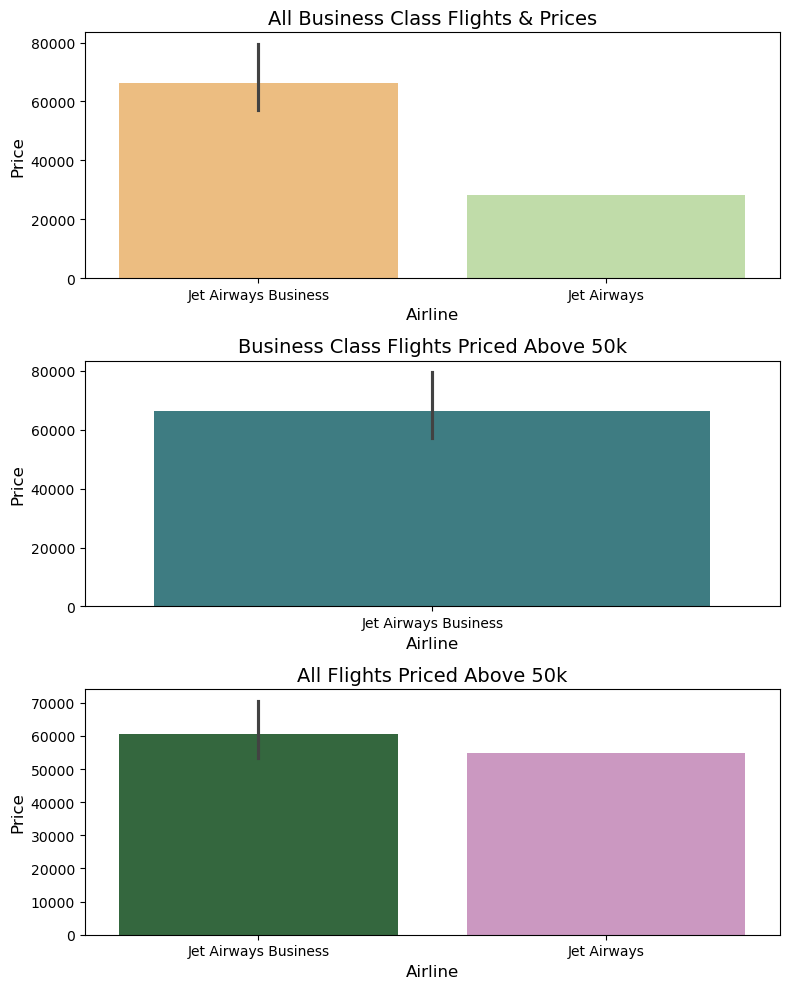

In [60]:
fig, axes = plt.subplots(3, 1, figsize=(8,10))

# Plot 1: All business class flights and their prices
sns.barplot(
    ax=axes[0],
    data=business_class,
    x="Airline",
    y="Price",
    palette="Spectral"
)
axes[0].set_title("All Business Class Flights & Prices", fontsize=14)
axes[0].set_xlabel("Airline", fontsize=12)
axes[0].set_ylabel("Price", fontsize=12)

# Plot 2: Business class flights with prices above 50k
sns.barplot(
    ax=axes[1],
    data=business_class_above_50k,
    x="Airline",
    y="Price",
    palette="crest"
)
axes[1].set_title("Business Class Flights Priced Above 50k", fontsize=14)
axes[1].set_xlabel("Airline", fontsize=12)
axes[1].set_ylabel("Price", fontsize=12)

# Plot 3: All flights with prices above 50k
sns.barplot(
    ax=axes[2],
    data=flights_above_50k,
    x="Airline",
    y="Price",
    palette="cubehelix"
)
axes[2].set_title("All Flights Priced Above 50k", fontsize=14)
axes[2].set_xlabel("Airline", fontsize=12)
axes[2].set_ylabel("Price", fontsize=12)
plt.tight_layout()
plt.show()


______________________

#### Q4) Perform encoding for the required features according to the data 

In [63]:
le=LabelEncoder()
train['Airline']=le.fit_transform(train['Airline'])
train['Source']=le.fit_transform(train['Source'])
train['Destination']=le.fit_transform(train['Destination'])
train['Route']=le.fit_transform(train['Route'])
train['Dep_Time']=le.fit_transform(train['Dep_Time'])
train['Arrival_Time']=le.fit_transform(train['Arrival_Time'])
train['Duration']=le.fit_transform(train['Duration'])
train['Additional_Info']=le.fit_transform(train['Additional_Info'])

In [64]:
train['Total_Stops'].replace('non-stop','0',inplace=True)
train['Total_Stops'].replace('1 stop','1',inplace=True)
train['Total_Stops'].replace('2 stops','2',inplace=True)
train['Total_Stops'].replace('3 stops','3',inplace=True)
train['Total_Stops'].replace('4 stops','4',inplace=True)

In [65]:
train['Total_Stops']=pd.to_numeric(train['Total_Stops'])

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           10682 non-null  int32
 1   Source            10682 non-null  int32
 2   Destination       10682 non-null  int32
 3   Route             10682 non-null  int32
 4   Dep_Time          10682 non-null  int32
 5   Arrival_Time      10682 non-null  int32
 6   Duration          10682 non-null  int32
 7   Total_Stops       10682 non-null  int64
 8   Additional_Info   10682 non-null  int32
 9   Price             10682 non-null  int64
 10  Day_of_journey    10682 non-null  int32
 11  Month_of_journey  10682 non-null  int32
 12  Year_of_journey   10682 non-null  int32
dtypes: int32(11), int64(2)
memory usage: 709.4 KB


_____________________

#### Q5) Build multiple model by using different algorithm such as Linear Regression, Decision Tree, and Random Forest etc. and check the performance of your model. 

In [69]:
X=train.drop(columns=['Price'])
y=train['Price']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Extra Tree':ExtraTreesRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'GB': GradientBoostingRegressor(random_state=42),
    'ADA': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    # Store the results
    results[name] = {'MSE': mse,'RMSE':rmse, 'R-squared': r2}

# Show results
results_df = pd.DataFrame(results).T
pd.options.display.float_format = '{:,.2f}'.format
results_df

,MSE,RMSE,R-squared
Linear Regression,"12,140,278.52","3,484.29",0.44
Decision Tree,"3,907,641.06","1,976.78",0.82
Extra Tree,"2,033,891.04","1,426.15",0.91
Random Forest,"2,111,685.17","1,453.16",0.90
GB,"3,082,749.90","1,755.78",0.86
ADA,"17,634,720.58","4,199.37",0.18
XGBoost,"1,859,668.91","1,363.70",0.91


_______________________

#### Q6) Compare all of the models and justify your choice about the optimum model by using different evaluation technique and tune the models as per the requirement.e.

**_Linear Regression_**  
MSE: 12,140,278.52  
RMSE: 3,484.29  
R-squared: 0.44  
**Observation: _Linear Regression performs the worst among all models, with a high MSE and RMSE, and a low R-squared value of 0.44. This indicates that it explains only 44% of the variance in the data, suggesting a poor fit and significant deviation from the actual values. Therefore, it is not the optimal model for this dataset._**  
______________________________________________________________________

**_Decision Tree_**  
MSE: 3,907,641.06  
RMSE: 1,976.78  
R-squared: 0.82  
**Observation: _Decision Tree outperforms Linear Regression, achieving a moderate R-squared value of 0.82, explaining 82% of the variance. However, its RMSE is higher compared to more complex models like XGBoost and Extra Trees, suggesting that its predictions are still somewhat distant from the true values. While it is a decent model, it is surpassed by other models in performance._**  
___________________________________

**_Extra Trees_**  
MSE: 2,033,891.04  
RMSE: 1,426.15  
R-squared: 0.91  
**Observation: _Extra Trees delivers excellent performance with an R-squared of 0.91, explaining 91% of the variance in the data. Its low MSE and RMSE further highlight its accuracy in predictions. Extra Trees emerges as one of the top models, performing on par with XGBoost._**

_________________________________  

**_Random Forest_**  
MSE: 2,111,685.17  
RMSE: 1,453.16  
R-squared: 0.90  
**Observation: _Random Forest demonstrates strong performance with an R-squared of 0.90, explaining 90% of the variance in the data. Its relatively low RMSE of 1,453.16 indicates good predictive accuracy. While Random Forest is a strong contender for the best model, it slightly trails behind XGBoost and Extra Trees in overall performance._**

_________________________________

**_Gradient Boosting (GB)_**  
MSE: 3,082,749.90  
RMSE: 1,755.78  
R-squared: 0.86  
**Observation: _GB achieves an R-squared value of 0.86, explaining 86% of the variance. Although its MSE and RMSE are higher than those of Random Forest, it still offers reasonable prediction accuracy. While a robust model, it is not as optimal as the top three models._**  

_________________________________


**_ADA (AdaBoost)_**  
MSE: 17,634,720.58  
RMSE: 4,199.37  
R-squared: 0.18  
**Observation: _AdaBoost has the lowest R-squared value of 0.18, explaining only 18% of the variance in the data. Its high MSE and RMSE further indicate poor prediction accuracy. Based on its performance, AdaBoost is not a suitable model for this dataset._**  

_________________________________


**_XGBoost_**  
MSE: 1,859,668.91  
RMSE: 1,363.70  
R-squared: 0.91  
**Observation: _XGBoost delivers the best performance among all models, with an R-squared value of 0.91, explaining 91% of the variance. Its low RMSE and MSE further highlight its excellent prediction accuracy. XGBoost stands out as the top model across all evaluation metrics._**




#### _Finally Considering the inferences for all the models, we can say that XGBoost has performed the best, and that is the model we will be going ahead with. Moreover, XGBoost optimizes gradient boosting by efficiently handling overfitting with regularization techniques. It also works well with large datasets and complex feature sets, which might be a factor in this task._

_______________________

#### Q7) Write a conclusion from the business point of view. Finally perform the same preprocessing technique for test data best practice using pipeline.

In [78]:
test=pd.read_excel(r"C:\Users\SHIVANG\Documents\Imarticus\Advance ML\Exam\ML Advanced Exam Paper\Dataset\Flight Price Dataset\Flight_Price_Test.xlsx",header=0)
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [79]:
X=test.copy()
X

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [80]:
X['Date_of_Journey'] = pd.to_datetime(X['Date_of_Journey'], format='%d/%m/%Y')
X['Dep_Time']=pd.to_datetime(X['Dep_Time'],format='%H:%M',errors='coerce').dt.time
X['Arrival_Time'] = pd.to_datetime(X['Arrival_Time'],errors='coerce').dt.time

In [81]:
X['Day_of_journey'] = X['Date_of_Journey'].dt.day
X['Month_of_journey'] = X['Date_of_Journey'].dt.month
X['Year_of_journey'] = X['Date_of_Journey'].dt.year
X.drop(columns=['Date_of_Journey'],inplace=True)

In [82]:
X['Airline']=le.fit_transform(X['Airline'])
X['Source']=le.fit_transform(X['Source'])
X['Destination']=le.fit_transform(X['Destination'])
X['Route']=le.fit_transform(X['Route'])
X['Dep_Time']=le.fit_transform(X['Dep_Time'])
X['Arrival_Time']=le.fit_transform(X['Arrival_Time'])
X['Duration']=le.fit_transform(X['Duration'])
X['Additional_Info']=le.fit_transform(X['Additional_Info'])

In [83]:
X['Total_Stops'].replace('non-stop','0',inplace=True)
X['Total_Stops'].replace('1 stop','1',inplace=True)
X['Total_Stops'].replace('2 stops','2',inplace=True)
X['Total_Stops'].replace('3 stops','3',inplace=True)
X['Total_Stops'].replace('4 stops','4',inplace=True)
X['Total_Stops']=pd.to_numeric(X['Total_Stops'])

In [84]:
XG_boost_model = models['XGBoost']

In [85]:
y_pred_XGBoost_model = XG_boost_model.predict(X)

In [86]:
test['XGBoost_Predicted_Prices']=y_pred_XGBoost_model
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,XGBoost_Predicted_Prices
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,"9,097.85"
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,"5,592.84"
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,"24,620.12"
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,"8,618.86"
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,"2,897.72"
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,"9,521.69"
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,"4,465.70"
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,"10,060.45"
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,"14,949.43"


## _Factors Influencing Flight Prices:_

_Airline_: The airline brand plays a significant role in determining the price, as we observe price variations between airlines like IndiGo, Air India, Jet Airways, and SpiceJet.

_Journey Date_: Flight prices fluctuate based on booking time and travel date. Generally, booking in advance leads to lower prices, while last-minute bookings tend to be more expensive.

_Source and Destination_: The route, including the source and destination cities, directly influences flight prices. Longer flights or international routes are typically more costly.

_Flight Duration and Stops_: Flights with fewer stops or direct routes tend to be more expensive. This aligns with customer preferences for convenience, which results in higher pricing.

_Additional Features_: Extra services such as in-flight meals or additional amenities also affect the price, with higher-priced flights often offering more extensive services.

##  _Busniess Insights_

### **_Optimizing Pricing Strategies:_**  
Prices can be adapted according to demand trends for specific routes or seasonal fluctuations, enabling airlines to fine-tune their pricing strategy based on travel demand.

### **_Enhancing Customer Experience:_**  
Integrating predictive models into the booking process enables airlines to offer personalized pricing recommendations and alerts. Customers can be notified of better prices based on travel time, route, and specific preferences, helping them make more informed decisions.

### **_Forecasting Demand Effectively:_**  
By understanding how factors like journey timing, route complexity, and airline reputation impact pricing, airlines can better forecast demand. This insight helps airlines tailor their marketing efforts, promotions, and discounts for specific routes during peak periods.

### **_Implementing Dynamic Pricing Models:_**  
The ability to predict flight prices based on multiple factors allows airlines to adopt dynamic pricing models. Prices can be adjusted in real time according to demand, booking time, and flight popularity, optimizing revenue while ensuring customer satisfaction.

### **_Analyzing Market Competition:_**  
Airlines can assess competitor pricing strategies based on factors like the number of stops and additional services, adjusting their own pricing models to remain competitive in the market.

### **_Targeting Customer Segments:_**  
Airlines and travel agencies can effectively target distinct customer segments by understanding their price sensitivity, allowing for more personalized marketing and pricing strategies.

_________________________________________

#### Done by: Shivang Talati :)